# GRIP at The Sparks Foundation

## Name: Love Fadia

### Task 1: Prediction using Supervised ML

#### Predict the percentage of an student based on the number of study hours

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

In [2]:
marks_data = pd.DataFrame(pd.read_csv("sml.csv"))

In [3]:
marks_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
marks_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
marks_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Train-Test Splitting

In [6]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(marks_data,test_size=0.2,random_state=0)
print(f"Rows in the train set: {len(train_set)}\nRows in the test set:{len(test_set)}")


Rows in the train set: 20
Rows in the test set:5


In [14]:
A = train_set.iloc[:, :-1].values  
B = train_set.iloc[:, 1].values    
A_test=test_set.iloc[:,:-1].values 
B_real=test_set.iloc[:,1].values   

# Model Fitting

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(A,B)
print("Model Trained")

Model Trained


In [9]:

print("Regression Intercept")
print(model.intercept_)
print("Regression Coefficent") 
print(model.coef_)

Regression Intercept
2.0181600414346974
Regression Coefficent
[9.91065648]


# Plotting the Regression line

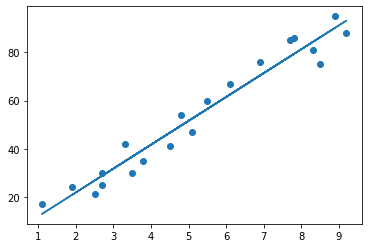

In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline
line = model.coef_*A+model.intercept_

# Plotting for the test data
plt.scatter(A, B)
plt.plot(A, line);
plt.show()

In [11]:
B_pred = model.predict(A_test)
comparision = pd.DataFrame({'Actual':B_real,'Predicted':B_pred})
comparision

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Model Testing

In [12]:
hours = 9.25
Newly_pred = model.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score =",(Newly_pred[0]),"%")

No of Hours = 9.25
Predicted Score = 93.69173248737535 %


# Model Evaluation

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(B_real, B_pred))
print('Mean Squared Error:', metrics.mean_squared_error(B_real, B_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(B_real, B_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
